# Sistema de Henon-Heiles

Considere un sistema bidimensional no lineal (Henon-Heiles o similar). Resuelva las ecuaciones de movimiento y compruebe la sensibilidad a las condiciones iniciales.

Analicemos el sistema bidimensional regido por el potencial de Henon-Heiles:

\begin{equation}
V(x,y)= \frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

El Hamiltoniano asociado al sistema es:

\begin{equation}
H=\frac{1}{2}\left(p_x^2+p_y^2\right)+\frac{1}{2}\left(x^2+y^2\right)+\lambda\left(x^2y-\frac{y^3}{3}\right)
\end{equation}

Las ecuaciones de Hamilton son entonces:

\begin{equation}
\dot x = p_x \\
\dot y = p_y \\
\dot p_x = -x-2\lambda xy \\
\dot p_y = -y - \lambda(x^2-y^2)
\end{equation}

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [35]:
def solve_system(x0,y0,px0,py0,t0,tf): 
    Y0=[x0,y0,px0,py0] #arreglo con las condiciones iniciales 
    t=np.linspace(t0,tf,1000000) #tiempo que dura la vaina

    l=1 #Parámetro lambda 

    def f(Y,t):
        x,y,px,py=Y 

        dx= px
        dpx=-x-2*l*x*y
        dy=py
        dpy=-y-l*(x**2-y**2)

        return ([dx,dy,dpx,dpy])

    sol=odeint(f,Y0,t)
    
    X=sol[:,0]
    Y=sol[:,1]
    PX=sol[:,2]
    PY=sol[:,3]
    
    return X,Y,PX,PY,t

In [95]:
def graphs(x,y,px,py,t):
    plt.figure(figsize=(14,9))
    plt.suptitle("Gráficas de sistema de Henon-Heiles")
    
    plt.subplots_adjust(hspace=0.3)
    
    plt.subplot(221)
    plt.title("Posiciones")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.grid(True)
    plt.plot(x,y,'g-')
    #plt.plot(-.2,.2,'ro',markersize=30)             #Para arbolito de navidad
    #plt.plot(0,0.5,'*',color='yellow',markersize=60)

    plt.subplot(222)
    plt.title("Momentos")
    plt.xlabel("Momento en x")
    plt.ylabel("Momento en y")
    plt.grid(True)
    plt.plot(px,py,'-')
    
    plt.subplot(223)
    plt.title("Espacio de fases")
    plt.xlabel("Posición en x")
    plt.ylabel("Momento en x")
    plt.grid(True)
    plt.plot(x,px,'-')
    
    plt.subplot(224)
    plt.title("Espacio de fases")
    plt.xlabel("Posición en y")
    plt.ylabel("Momento en y")
    plt.grid(True)
    plt.plot(y,py,'g-')

In [97]:
def main(x0,y0,px0,py0,t0,tf):
    sol=solve_system(x0,y0,px0,py0,t0,tf)
    graphs(*sol)

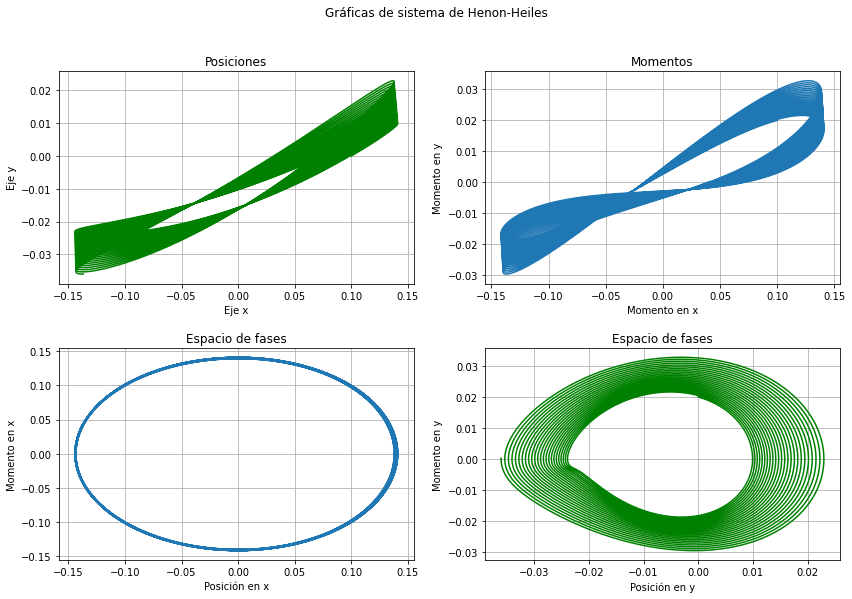

In [105]:
main(0.1,0,0.1,0.02,0,150)

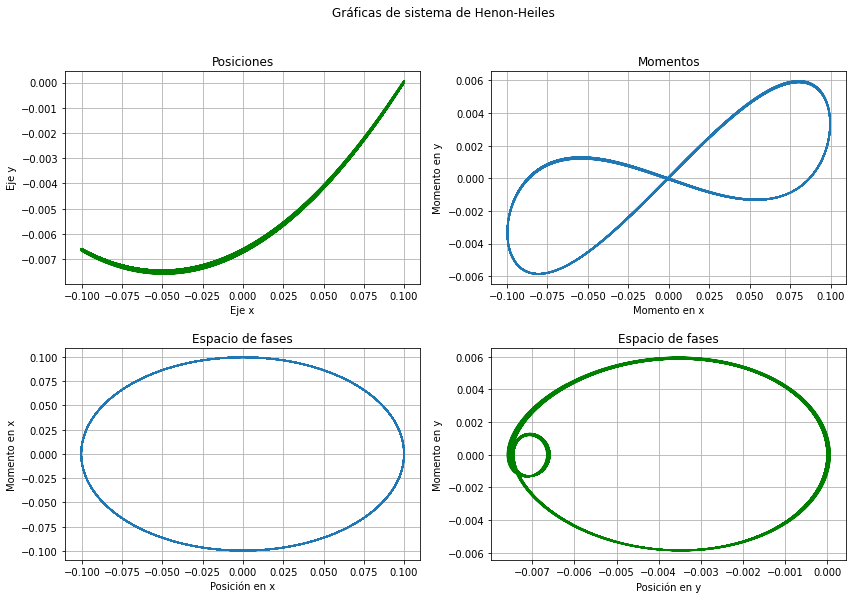

In [106]:
main(0.1,0,0,0,0,150)